# Telecom X – Parte 2: Predicción de Cancelación (Churn)

## 🧠 Objetivos del Desafío
* Preparar los datos para el modelado (tratamiento, codificación, normalización).
* Realizar análisis de correlación y selección de variables.
* Entrenar dos o más modelos de clasificación.
* Evaluar el rendimiento de los modelos con métricas.
* Interpretar los resultados, incluyendo la importancia de las variables.
* Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

## 1. Preparación de Datos

### 1.1 Carga y exploración inicial de datos

In [415]:
#importar el archivo de datos
import pandas as pd
#cargar el archivo de datos
data = pd.read_csv('https://raw.githubusercontent.com/anasayago/challenge2-data-science-latam/refs/heads/main/datos_tratados_2.csv',sep=',')
data.shape

(7043, 24)

In [416]:
#primeras filas del archivo de datos
data.head()

,ID Cliente,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Servicio de Internet,...,TV por Cable,Streaming de Películas,Tipo de Contrato,Facturación Sin Papel,Método de Pago,Costo Mensual,Costo Total,Costo Diario,Rango de Contrato,Cantidad de Servicios Contratados
0,0002-ORFBO,0,F,False,1,1,9,1,0,DSL,...,1,0,Anual,1,Cheque por Correo,65.6,593.30,2.19,0-10,3
1,0003-MKNFE,0,M,False,0,0,9,1,1,DSL,...,0,1,Mensual,0,Cheque por Correo,59.9,542.40,2.00,0-10,2
2,0004-TLHLJ,1,M,False,0,0,4,1,0,Fibra Óptica,...,0,0,Mensual,1,Cheque electrónico,73.9,280.85,2.46,0-10,1
3,0011-IGKFF,1,M,True,1,0,13,1,0,Fibra Óptica,...,1,1,Mensual,1,Cheque electrónico,98.0,1237.85,3.27,11-20,4
4,0013-EXCHZ,1,F,True,1,0,3,1,0,Fibra Óptica,...,1,0,Mensual,1,Cheque por Correo,83.9,267.40,2.80,0-10,2


In [417]:
# Análisis inicial
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID Cliente                         7043 non-null   object 
 1   Abandono                           7043 non-null   int64  
 2   Género                             7043 non-null   object 
 3   Mayor de 65 años                   7043 non-null   bool   
 4   Tiene Pareja                       7043 non-null   int64  
 5   Tiene Dependientes                 7043 non-null   int64  
 6   Duración del Contrato (meses)      7043 non-null   int64  
 7   Servicio Telefónico                7043 non-null   int64  
 8   Múltiples Líneas                   7043 non-null   int64  
 9   Servicio de Internet               7043 non-null   object 
 10  Seguridad en Línea                 7043 non-null   int64  
 11  Respaldo en Línea                  7043 non-null   int64

In [418]:
print("\nDistribución de Abandono:")
print(data['Abandono'].value_counts(normalize=True))


Distribución de Abandono:
Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64


 ⚠️ Identificación de **desbalanceo de clases**
* No abandono:  73.463 %
* Abandono:  26.537 %

In [419]:
#variables númericas
data.describe()

,Abandono,Tiene Pareja,Tiene Dependientes,Duración del Contrato (meses),Servicio Telefónico,Múltiples Líneas,Seguridad en Línea,Respaldo en Línea,Protección del Dispositivo,Soporte Técnico,TV por Cable,Streaming de Películas,Facturación Sin Papel,Costo Mensual,Costo Total,Costo Diario,Cantidad de Servicios Contratados
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.483033,0.299588,32.371149,0.903166,0.325004,0.069999,0.128212,0.127219,0.073548,0.167684,0.171234,0.592219,64.761692,2279.734304,2.158675,2.459747
std,0.441561,0.499748,0.458110,24.559481,0.295752,0.642730,0.706051,0.738369,0.737868,0.708201,0.756958,0.758507,0.491457,30.090047,2266.794470,1.003088,2.045539
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,18.250000,0.000000,0.610000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000,1.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000,2.000000
75%,1.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000,4.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000,7.000000


In [420]:
#variables categóricas
data.describe(include='object')

,ID Cliente,Género,Servicio de Internet,Tipo de Contrato,Método de Pago,Rango de Contrato
count,7043,7043,7043,7043,7043,7043
unique,7043,2,3,3,4,8
top,0002-ORFBO,M,Fibra Óptica,Mensual,Cheque electrónico,0-10
freq,1,3555,3096,3875,2365,1854


### 1.2 Limpieza y Prerapación de Datos

* Se elimina 'ID Cliente' por ser identificador único que no aporta información predictiva
* Se elimina 'Costo Diario' ya que deriva de 'Costo Mensual', lo que puede introducir multicolinealidad
* Se elimina 'Duración del Contrato (meses)' ya que existe Rango de Contrato y puede ser usado 



In [421]:
# Apartar en otro dataset para probar impacto de eliminar 'Rango de Contrato' ya que existe 'Duración del Contrato'
data_sin_rango = data.drop(columns=['ID Cliente','Costo Diario','Rango de Contrato'])
# Verificar si se eliminaron correctamente
print("\nColumnas después de eliminar 'Rango de Contrato':")
print(data_sin_rango.columns)


Columnas después de eliminar 'Rango de Contrato':
Index(['Abandono', 'Género', 'Mayor de 65 años', 'Tiene Pareja',
       'Tiene Dependientes', 'Duración del Contrato (meses)',
       'Servicio Telefónico', 'Múltiples Líneas', 'Servicio de Internet',
       'Seguridad en Línea', 'Respaldo en Línea', 'Protección del Dispositivo',
       'Soporte Técnico', 'TV por Cable', 'Streaming de Películas',
       'Tipo de Contrato', 'Facturación Sin Papel', 'Método de Pago',
       'Costo Mensual', 'Costo Total', 'Cantidad de Servicios Contratados'],
      dtype='object')


In [422]:
# Eliminar columnas que no aportan información relevante
data = data.drop(columns=['ID Cliente','Costo Diario','Duración del Contrato (meses)'])

In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Abandono                           7043 non-null   int64  
 1   Género                             7043 non-null   object 
 2   Mayor de 65 años                   7043 non-null   bool   
 3   Tiene Pareja                       7043 non-null   int64  
 4   Tiene Dependientes                 7043 non-null   int64  
 5   Servicio Telefónico                7043 non-null   int64  
 6   Múltiples Líneas                   7043 non-null   int64  
 7   Servicio de Internet               7043 non-null   object 
 8   Seguridad en Línea                 7043 non-null   int64  
 9   Respaldo en Línea                  7043 non-null   int64  
 10  Protección del Dispositivo         7043 non-null   int64  
 11  Soporte Técnico                    7043 non-null   int64

### 1.3 Analisis de Gráficos para variables númericas relevantes

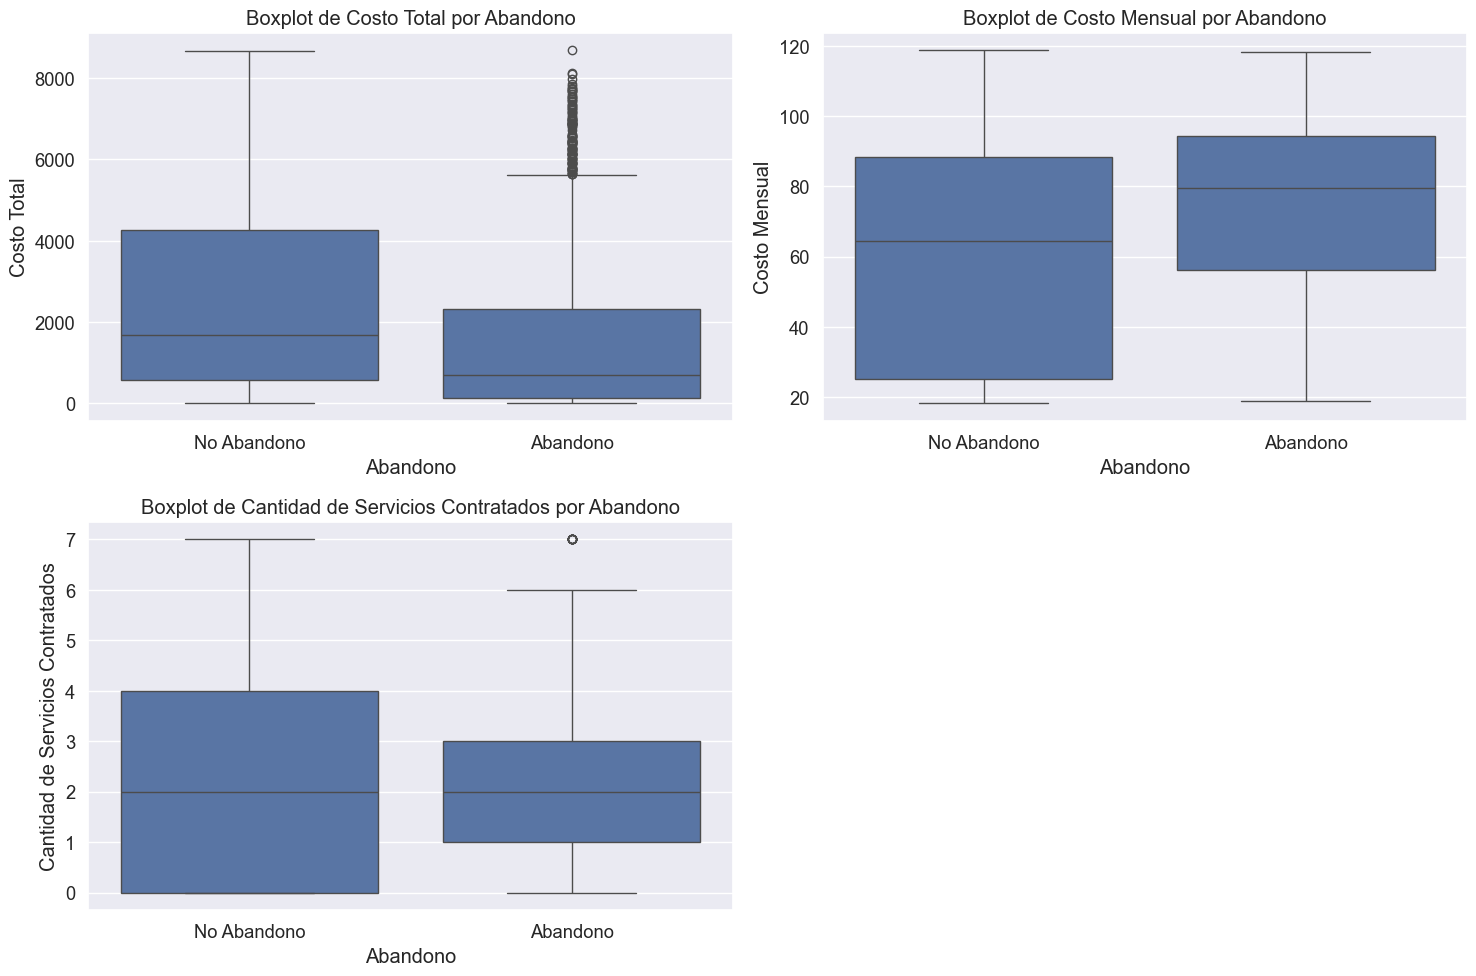

In [424]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))

columnas_numericas = [
    'Costo Total',
    'Costo Mensual',
    'Cantidad de Servicios Contratados'
]

for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Abandono', y=columna, data=data)
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


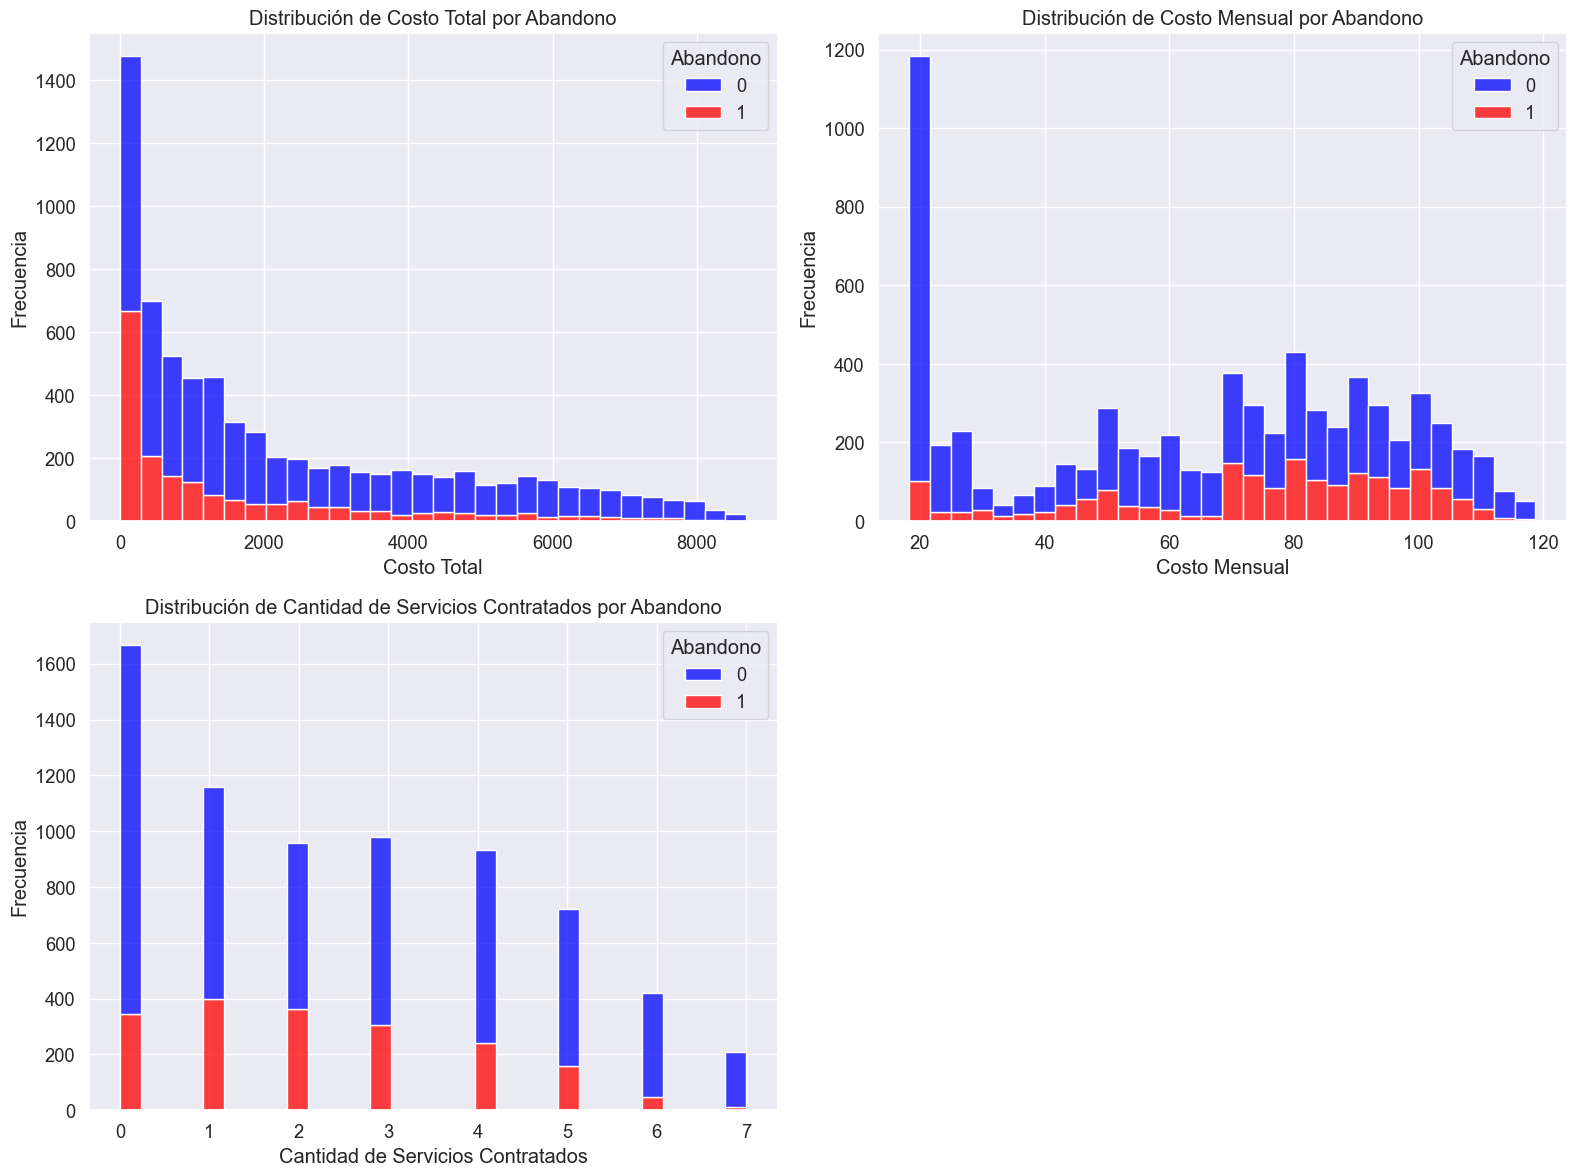


Estadísticas para Costo Total:
           count         mean          std    min    25%       50%      75%  \
Abandono                                                                      
0         5174.0  2549.911442  2329.954215   0.00  572.9  1679.525  4262.85   
1         1869.0  1531.796094  1890.822994  18.85  134.5   703.550  2331.30   

              max  
Abandono           
0         8672.45  
1         8684.80  

Estadísticas para Costo Mensual:
           count       mean        std    min    25%     50%   75%     max
Abandono                                                                  
0         5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75
1         1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35

Estadísticas para Cantidad de Servicios Contratados:
           count      mean       std  min  25%  50%  75%  max
Abandono                                                     
0         5174.0  2.545226  2.149223  0.0  0.0  2.0  4.0  7

In [425]:
# Visualización de la distribución de las variables numéricas por Abandono(Crunch)
plt.figure(figsize=(16,12))

# Histogramas por estado de Abandono
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 2, i)

    # Histograma separado por abandono
    sns.histplot(
        data=data,
        x=columna,
        hue='Abandono',
        multiple="stack",  # Apilar histogramas
        palette=['blue', 'red'],  # Colores distintivos
        bins=30  # Número de bins
    )

    plt.title(f'Distribución de {columna} por Abandono')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Análisis estadístico complementario
for columna in columnas_numericas:
    print(f"\nEstadísticas para {columna}:")
    print(data.groupby('Abandono')[columna].describe())



⚠️ Las variables muestran distribuciones asimétricas (desviación estándar significativa)
* Duración del Contrato
    - Asimetría positiva (sesgo a derecha)
    - Concentración de datos en valores bajos
    - Rango amplio (0-72 meses)
* Costo Total
    - Fuerte asimetría positiva
    - Muchos valores bajos
    - Pocos valores extremadamente altos
* Cantidad de Servicios Contratados
    - Distribución cercana a normal
    - Rango discreto y limitado

### 1.4 Gráficos de variables categóricas

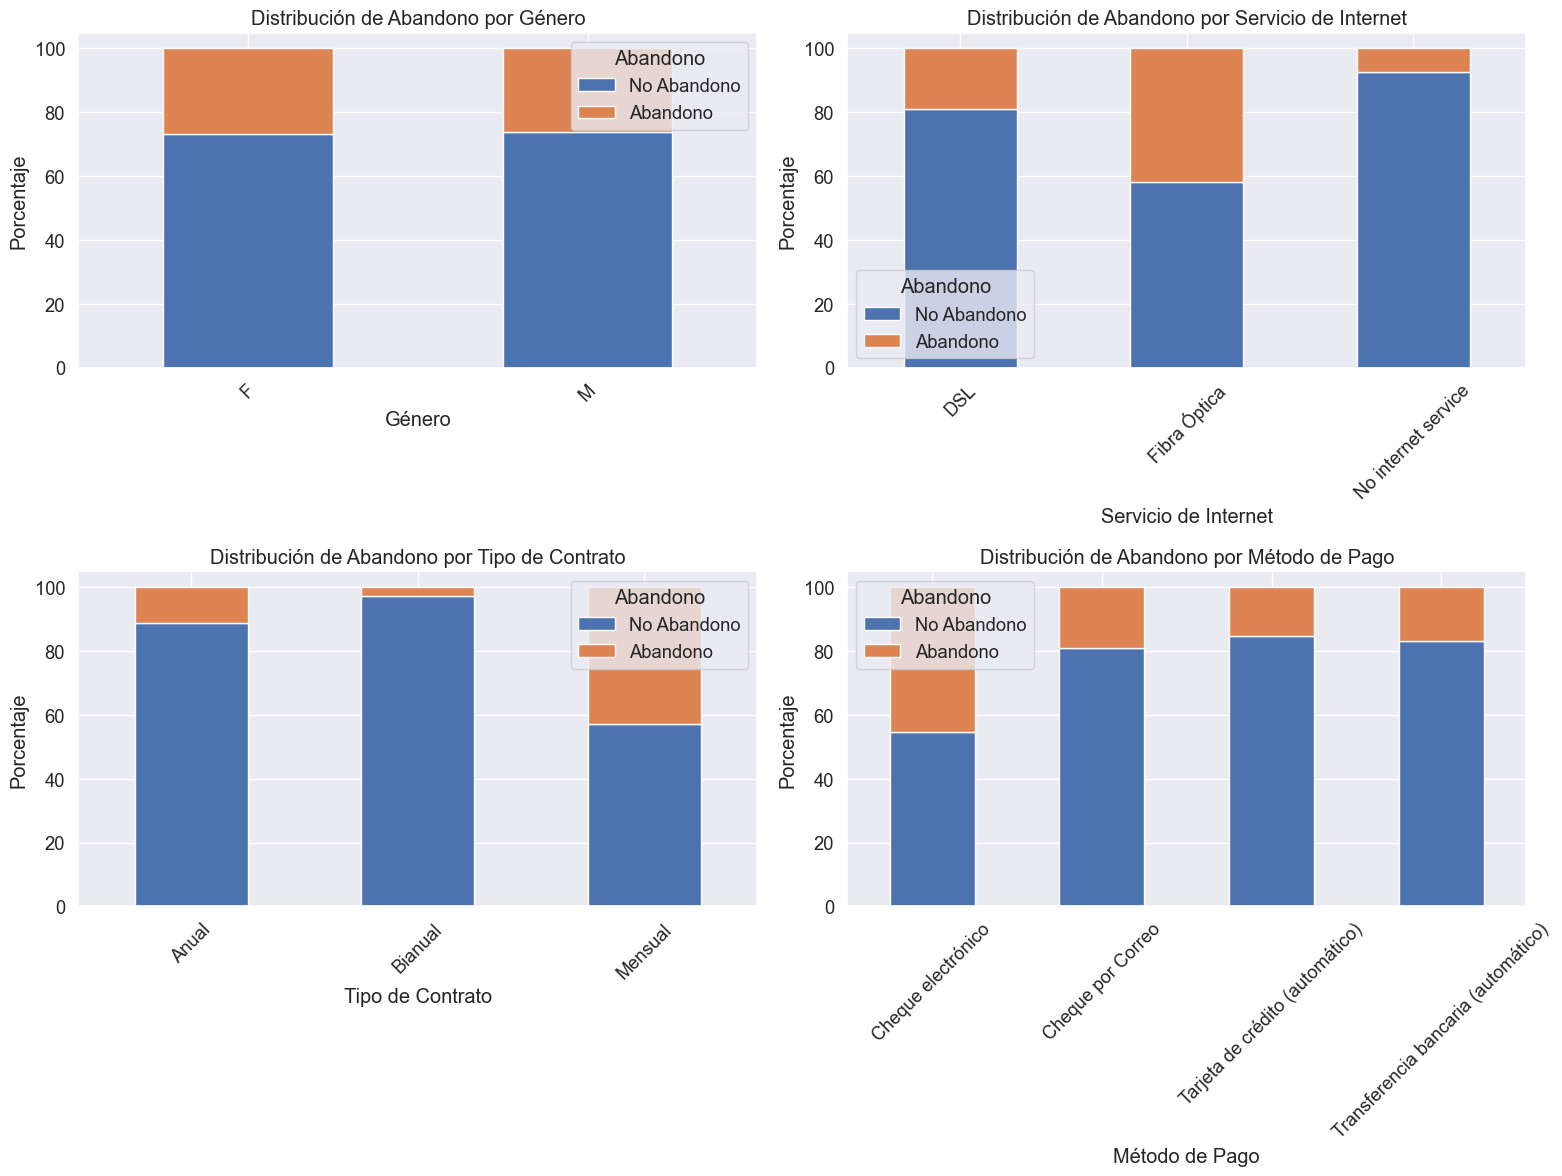

In [426]:
# Variables categóricas
categoricas = ['Género', 'Servicio de Internet', 'Tipo de Contrato', 'Método de Pago']
plt.figure(figsize=(16,12))

for i, variable in enumerate(categoricas, 1):
    plt.subplot(2, 2, i)

    # Gráfico de distribución con abandono
    data_plot = data.groupby([variable, 'Abandono']).size().unstack(fill_value=0)
    data_plot_percent = data_plot.div(data_plot.sum(axis=1), axis=0) * 100

    data_plot_percent.plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Distribución de Abandono por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Porcentaje')
    plt.legend(title='Abandono', labels=['No Abandono', 'Abandono'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [427]:
# Chi-cuadrado para evaluar dependencia
from scipy.stats import chi2_contingency

for variable in categoricas:
    contingencia = pd.crosstab(data[variable], data['Abandono'])
    chi2, p_value, dof, expected = chi2_contingency(contingencia)

    print(f"\nVariable: {variable}")
    print(f"Chi-cuadrado: {chi2}")
    print(f"P-value: {p_value}")
    print("Significativa:" + " Sí" if p_value < 0.05 else " No")



Variable: Género
Chi-cuadrado: 0.4840828822091383
P-value: 0.48657873605618596
 No

Variable: Servicio de Internet
Chi-cuadrado: 732.309589667794
P-value: 9.571788222840544e-160
Significativa: Sí

Variable: Tipo de Contrato
Chi-cuadrado: 1184.5965720837926
P-value: 5.863038300673393e-258
Significativa: Sí

Variable: Método de Pago
Chi-cuadrado: 648.1423274814
P-value: 3.6823546520098007e-140
Significativa: Sí


### 1.5 Información Mutua con Variable Abandono

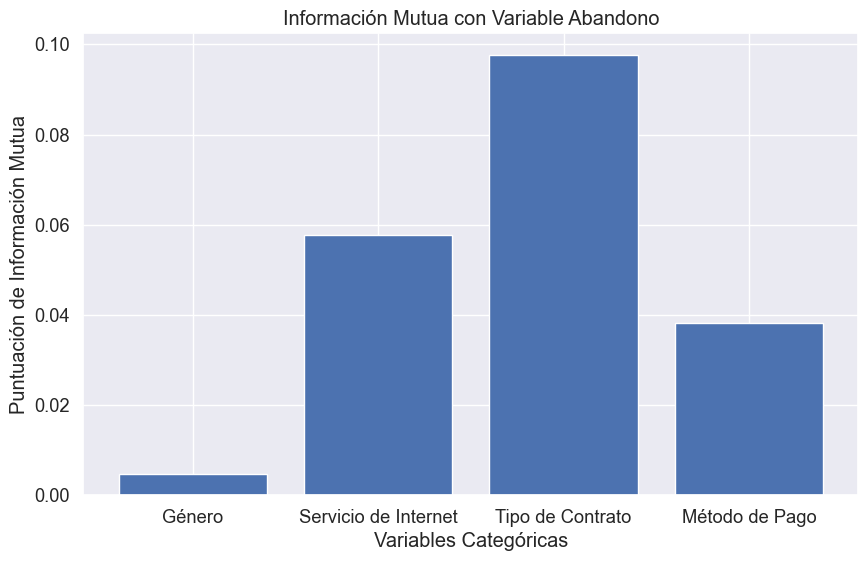

Género: 0.004743786144326467
Servicio de Internet: 0.057784218251252684
Tipo de Contrato: 0.09758983710569513
Método de Pago: 0.038314628801598305


In [428]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_encoded = data[categoricas].apply(le.fit_transform)

# Calcular información mutua
mi_scores = mutual_info_classif(X_encoded, data['Abandono'])

# Visualizar
plt.figure(figsize=(10,6))
plt.bar(categoricas, mi_scores)
plt.title('Información Mutua con Variable Abandono')
plt.xlabel('Variables Categóricas')
plt.ylabel('Puntuación de Información Mutua')
plt.show()

# Imprimir scores
for var, score in zip(categoricas, mi_scores):
    print(f"{var}: {score}")


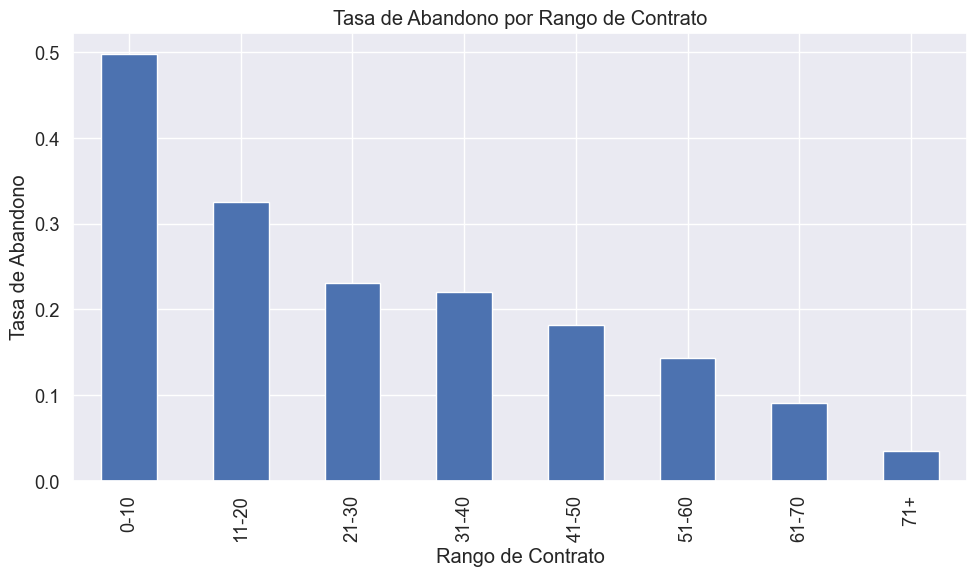

In [429]:
# Análisis de la tasa de abandono por rango de contrato

plt.figure(figsize=(10,6))
churn_by_contract = data.groupby('Rango de Contrato')['Abandono'].mean()
churn_by_contract.plot(kind='bar')
plt.title('Tasa de Abandono por Rango de Contrato')
plt.ylabel('Tasa de Abandono')
plt.xlabel('Rango de Contrato')
plt.tight_layout()
plt.show()

### 1.3 Detección y tratamiento de outliers


In [430]:
def agrupar_por_churn(rango):
    if rango in ['0-10', '11-20']:
        return 'Riesgo Alto'
    elif rango in ['21-30', '31-40']:
        return 'Riesgo Medio'
    else:
        return 'Riesgo Bajo'

data['Rango_Contrato'] = data['Rango de Contrato'].apply(agrupar_por_churn)
#Eliminar columna original
data = data.drop(columns=['Rango de Contrato'])

⚠️ Las variables muestran distribuciones asimétricas (desviación estándar significativa)
* Duración del Contrato -  Asimetría positiva (sesgo a derecha) - Logarítmica
   
* Costo Total - Fuerte asimetría positiva - Raíz cuadrada

In [431]:
import numpy as np
from scipy import stats
# Transformaciones
data['log_costo_total'] = np.log1p(data['Costo Total'])
data['sqr_costo_total']= np.sqrt(data['Costo Total'])
#data['log_costo_total'] = stats.boxcox(data['Costo Total'] + 1)
data['boxcx_costo_mensual'], _ = stats.boxcox(data['Costo Mensual'] + 1)
data['sqr_costo_mensual'] = np.sqrt(data['Costo Mensual'])
#data['sqr_duracion_contrato'] = np.sqrt(data['Duración del Contrato (meses)'])
data['sqr_servicios'] = np.sqrt(data['Cantidad de Servicios Contratados'])
data.head()

,Abandono,Género,Mayor de 65 años,Tiene Pareja,Tiene Dependientes,Servicio Telefónico,Múltiples Líneas,Servicio de Internet,Seguridad en Línea,Respaldo en Línea,...,Método de Pago,Costo Mensual,Costo Total,Cantidad de Servicios Contratados,Rango_Contrato,log_costo_total,sqr_costo_total,boxcx_costo_mensual,sqr_costo_mensual,sqr_servicios
0,0,F,False,1,1,1,0,DSL,0,1,...,Cheque por Correo,65.6,593.30,3,Riesgo Alto,6.387384,24.357750,51.741233,8.099383,1.732051
1,0,M,False,0,0,1,1,DSL,0,0,...,Cheque por Correo,59.9,542.40,2,Riesgo Alto,6.297846,23.289483,47.538605,7.739509,1.414214
2,1,M,False,0,0,1,0,Fibra Óptica,0,0,...,Cheque electrónico,73.9,280.85,1,Riesgo Alto,5.641375,16.758580,57.814375,8.596511,1.000000
3,1,M,True,1,0,1,0,Fibra Óptica,0,1,...,Cheque electrónico,98.0,1237.85,4,Riesgo Alto,7.121939,35.183093,75.187363,9.899495,2.000000
4,1,F,True,1,0,1,0,Fibra Óptica,0,0,...,Cheque por Correo,83.9,267.40,2,Riesgo Alto,5.592478,16.352370,65.066470,9.159694,1.414214


<Figure size 1500x1000 with 0 Axes>

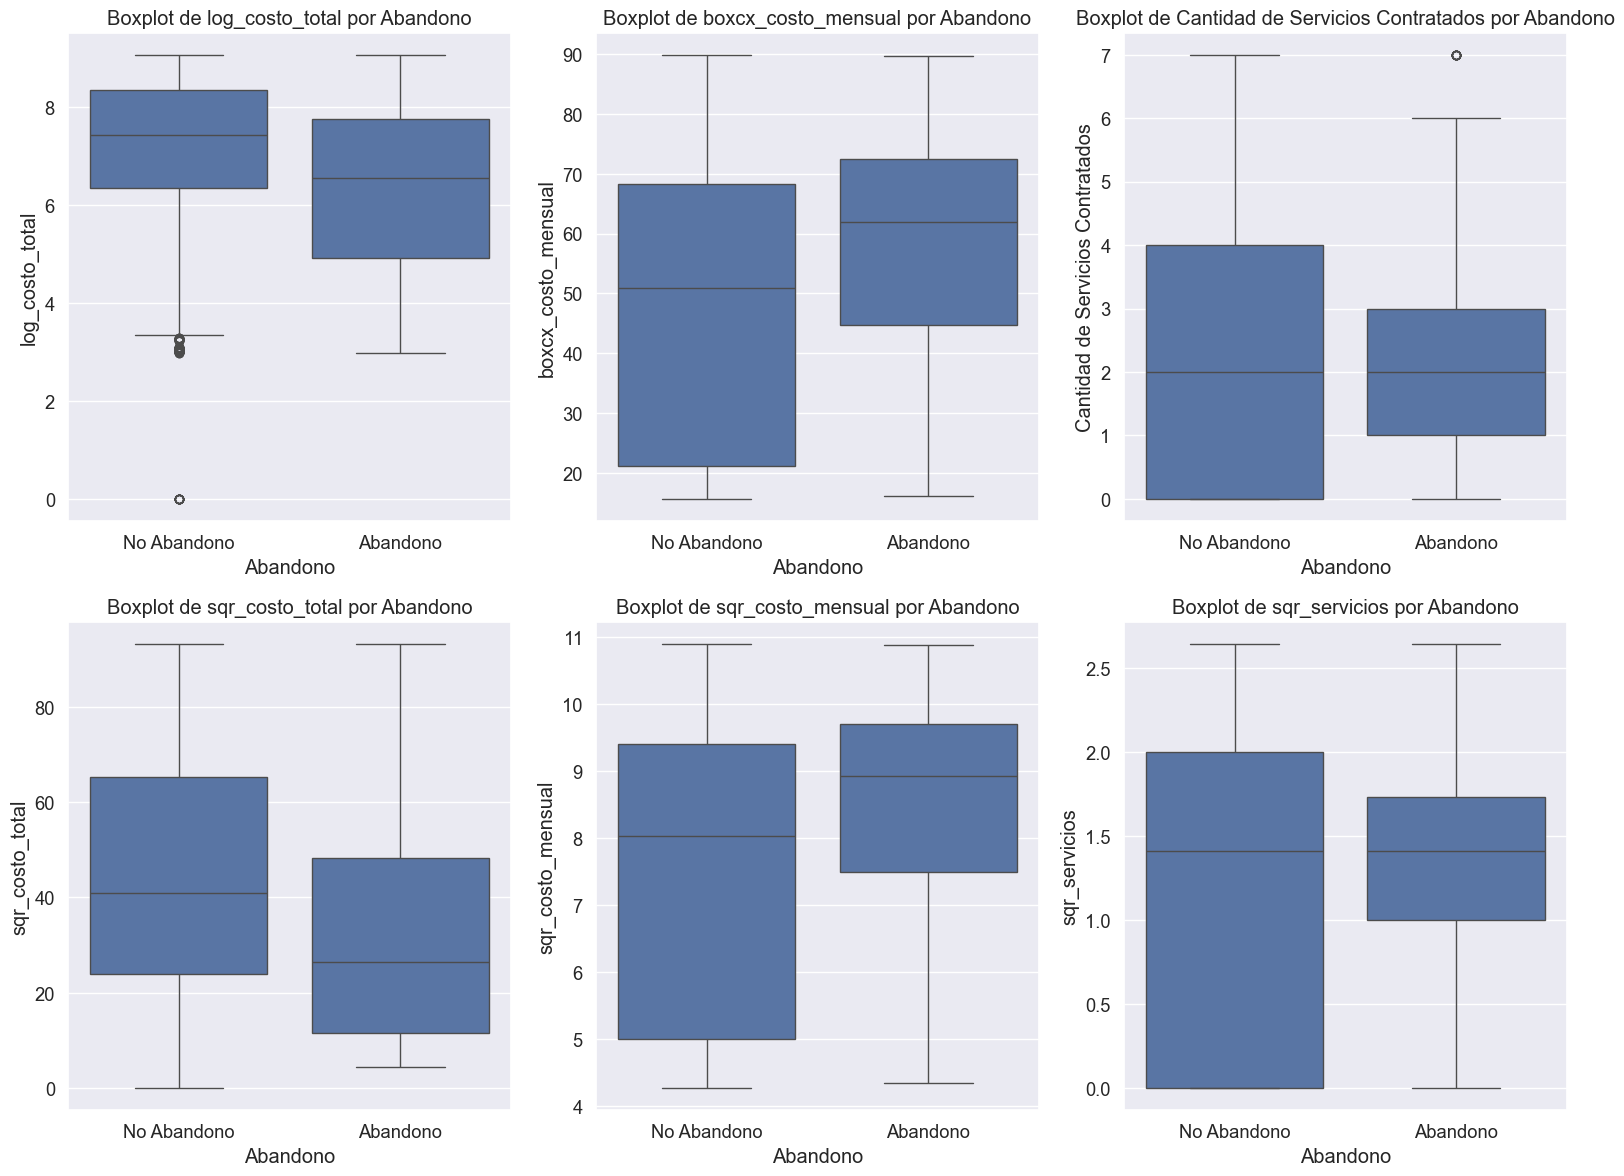

In [432]:
plt.figure(figsize=(15,10))

# Columnas numéricas
columnas_numericas = [
    'log_costo_total',
    'boxcx_costo_mensual',
    'Cantidad de Servicios Contratados',
    'sqr_costo_total',
    'sqr_costo_mensual',
    'sqr_servicios'
]

# Visualización de boxplots por estado de Abandono de las columnas numéricas
plt.figure(figsize=(16,12))
for i, columna in enumerate(columnas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Abandono', y=columna, data=data)
    plt.title(f'Boxplot de {columna} por Abandono')
    plt.xticks([0, 1], ['No Abandono', 'Abandono'])

plt.tight_layout()
plt.show()


In [433]:
#eliminar variables transformadas porque no logran una mejora significativa en la distribución
data = data.drop(columns=['log_costo_total', 'boxcx_costo_mensual'])

In [434]:
#eliminar las variables transformadas, posteriormene se analizará si se vuelven a incluir
data = data.drop(columns=['Costo Total','Costo Mensual','Cantidad de Servicios Contratados'])

In [435]:
data.columns

Index(['Abandono', 'Género', 'Mayor de 65 años', 'Tiene Pareja',
       'Tiene Dependientes', 'Servicio Telefónico', 'Múltiples Líneas',
       'Servicio de Internet', 'Seguridad en Línea', 'Respaldo en Línea',
       'Protección del Dispositivo', 'Soporte Técnico', 'TV por Cable',
       'Streaming de Películas', 'Tipo de Contrato', 'Facturación Sin Papel',
       'Método de Pago', 'Rango_Contrato', 'sqr_costo_total',
       'sqr_costo_mensual', 'sqr_servicios'],
      dtype='object')

### 1.4 Codificación de variables categóricas

In [436]:
# One-Hot Encoding con get_dummies
categoricas = ['Género', 'Tipo de Contrato', 'Método de Pago','Rango_Contrato', 'Servicio de Internet']

# Aplicación básica
data_encoded = pd.get_dummies(data, columns=categoricas)

# Opciones adicionales
data_encoded = pd.get_dummies(
    data,
    columns=categoricas,
    prefix=categoricas,  # Prefijo para nuevas columnas
    drop_first=True     # Elimina primera categoría para evitar multicolinealidad
)
print("\nDatos después de One-Hot Encoding:")
print(data_encoded.shape)
print(data_encoded.columns)


Datos después de One-Hot Encoding:
(7043, 26)
Index(['Abandono', 'Mayor de 65 años', 'Tiene Pareja', 'Tiene Dependientes',
       'Servicio Telefónico', 'Múltiples Líneas', 'Seguridad en Línea',
       'Respaldo en Línea', 'Protección del Dispositivo', 'Soporte Técnico',
       'TV por Cable', 'Streaming de Películas', 'Facturación Sin Papel',
       'sqr_costo_total', 'sqr_costo_mensual', 'sqr_servicios', 'Género_M',
       'Tipo de Contrato_Bianual', 'Tipo de Contrato_Mensual',
       'Método de Pago_Cheque por Correo',
       'Método de Pago_Tarjeta de crédito (automático)',
       'Método de Pago_Transferencia bancaria (automático)',
       'Rango_Contrato_Riesgo Bajo', 'Rango_Contrato_Riesgo Medio',
       'Servicio de Internet_Fibra Óptica',
       'Servicio de Internet_No internet service'],
      dtype='object')



Variables de Interes en Matriz de Correlación:
Abandono                                              1.000000
Tipo de Contrato_Mensual                              0.405103
Servicio de Internet_Fibra Óptica                     0.308020
sqr_costo_mensual                                     0.203373
Facturación Sin Papel                                 0.191825
TV por Cable                                          0.164673
Streaming de Películas                                0.163220
Mayor de 65 años                                      0.150889
Protección del Dispositivo                            0.084654
Respaldo en Línea                                     0.074205
Múltiples Líneas                                      0.036310
Soporte Técnico                                       0.027037
Seguridad en Línea                                    0.023309
Servicio Telefónico                                   0.011942
Género_M                                             -0.008612
sqr_ser

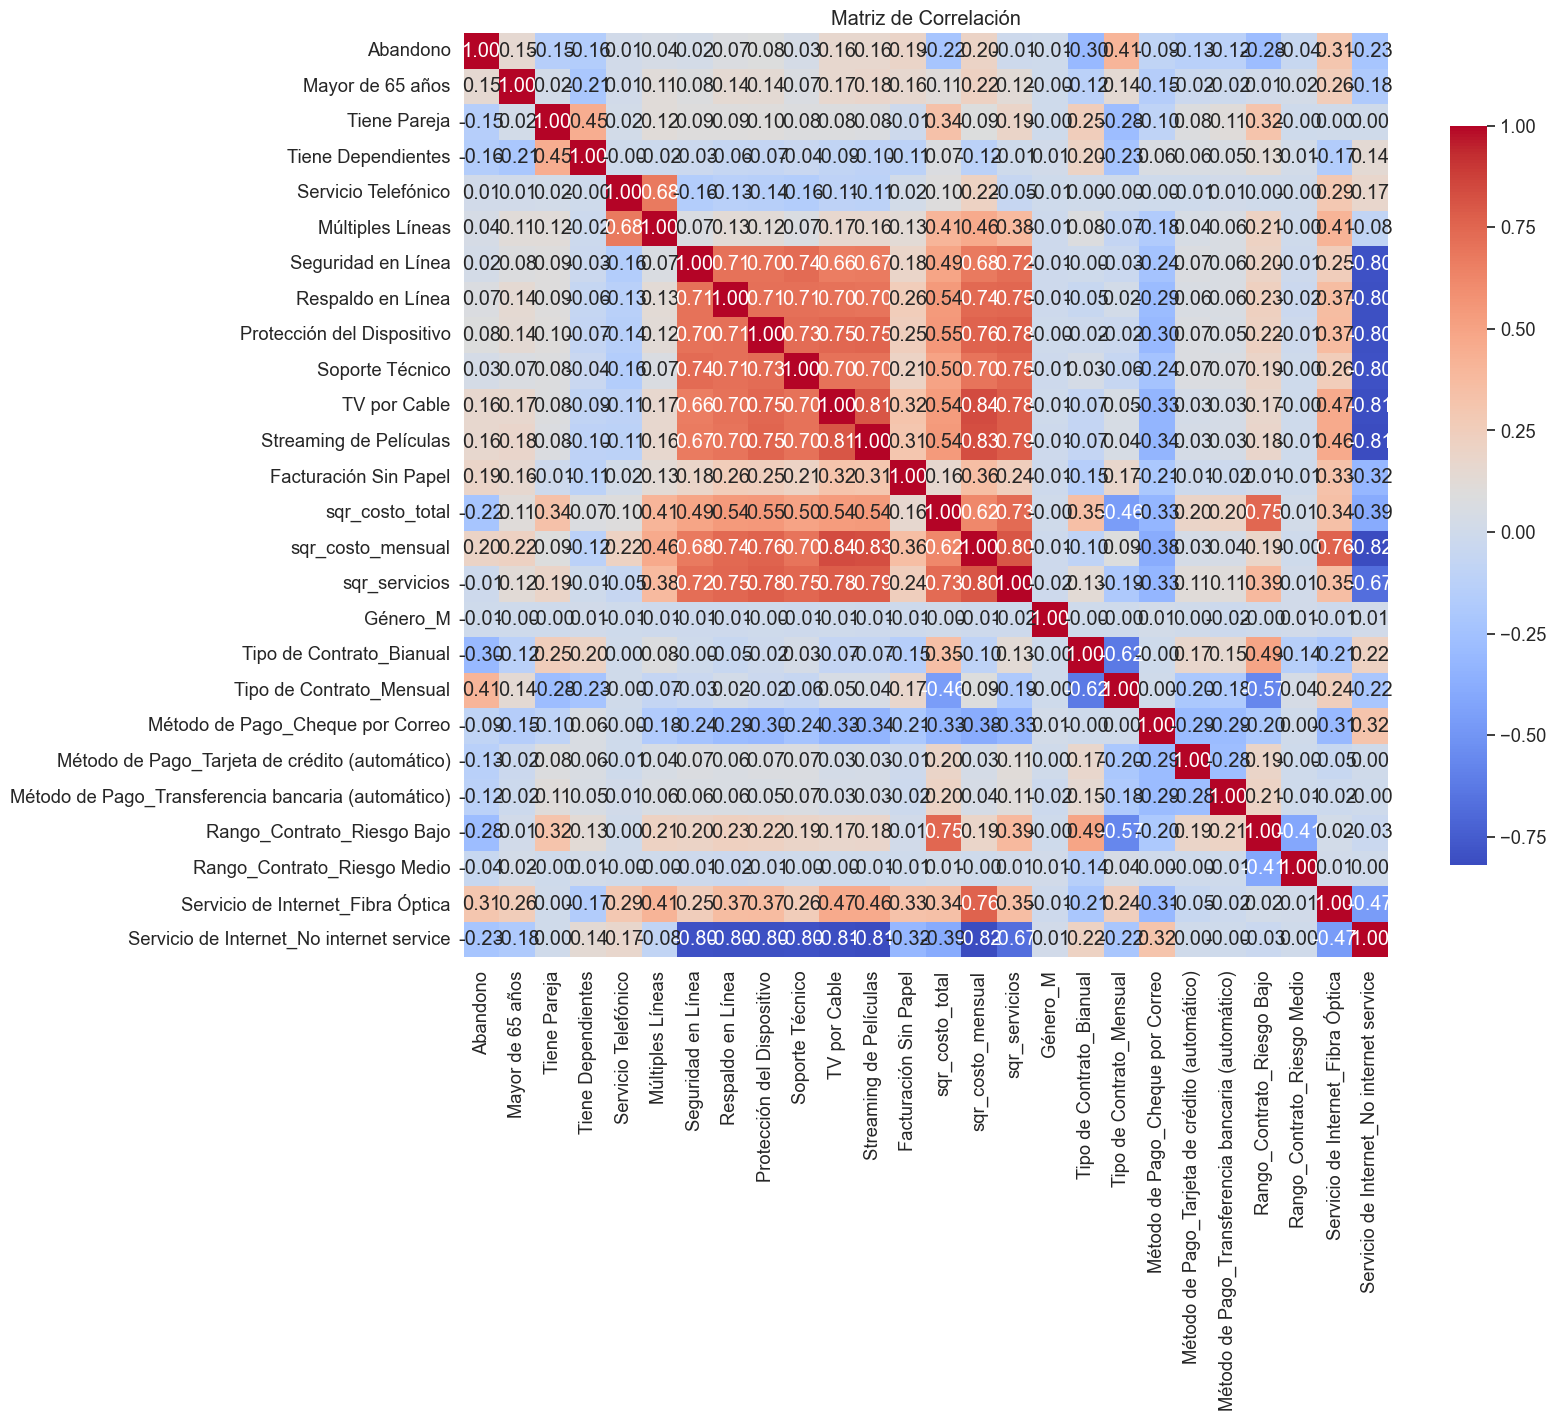

In [437]:
# analisis de correlación
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,12))
correlation_matrix = data_encoded.corr()

# Extraer variables de interés
print("\nVariables de Interes en Matriz de Correlación:")
print(correlation_matrix['Abandono'].sort_values(ascending=False))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación')
plt.show()

* Correlaciones Positivas (Aumentan probabilidad de Abandono): 
    - Tipo de Contrato_Mensual (0.405)
    - Servicio de Internet_Fibra Óptica (0.308)
    - sqr_costo_mensual (0.203)
    - Facturación Sin Papel (0.192)
    - TV por Cable (0.165)
    - Streaming de Películas (0.163)
    - Mayor de 65 años (0.151)

* Correlaciones Negativas (Disminuyen probabilidad de Abandono):
    - Rango_Contrato_Riesgo Bajo (-0.284)
    - Tipo de Contrato_Bianual (-0.302)
    - Servicio de Internet_No internet service (-0.228)
    - sqr_costo_total (-0.223)
    - Tiene Dependientes (-0.164)
    - Tiene Pareja (-0.150)
    - Método de Pago_Tarjeta de crédito (automático) (-0.134)

## 3. Preparación para Modelado

### 3.1 Separación de Datos

In [438]:
# Variable dependiente
y = data_encoded['Abandono']
# Variables independientes
X = data_encoded.drop(columns=['Abandono'])

In [439]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 3.2 Balanceo de clases

In [440]:
# Contar distribución de clases
distribucion = data_encoded['Abandono'].value_counts(normalize=True)
print(distribucion)

# Calcular ratio de desbalanceo
ratio = len(data_encoded[data_encoded['Abandono']==0]) / len(data[data['Abandono']==1])
print(f"Ratio de desbalanceo: {ratio}")

Abandono
0    0.73463
1    0.26537
Name: proportion, dtype: float64
Ratio de desbalanceo: 2.7683253076511503


In [441]:
# Aplicar SMOTE en datos de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar distribución
print("Distribución original:", y_train.value_counts(normalize=True))
print("Distribución después de SMOTE:", y_train_resampled.value_counts(normalize=True))

Distribución original: Abandono
0    0.734647
1    0.265353
Name: proportion, dtype: float64
Distribución después de SMOTE: Abandono
0    0.5
1    0.5
Name: proportion, dtype: float64


## 4. Entrenamiento de Modelos

### 4.1 Random Forest

In [442]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Crear y entrenar el modelo Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = model_rf.predict(X_test)

### 4.2 Catboost

In [443]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [444]:
from catboost import CatBoostClassifier

# Configuración del modelo CatBoost
model_cb = CatBoostClassifier(
    iterations=300,  # Aumentar iteraciones
    learning_rate= 0.1,  # Probar diferentes tasas
    depth=6,  # Variar profundidad
    l2_leaf_reg=3,  # Regularización
    random_seed=42,
    verbose=0  # Quita mensajes de progreso
)

# Entrenar el modelo CatBoost
model_cb.fit(X_train, y_train)
# Hacer predicciones
y_pred_cb = model_cb.predict(X_test)


### 4.2 Xgboost

In [445]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [446]:
import xgboost as xgb

# Entrenar el modelo XGBoost
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)
# Hacer predicciones
y_pred_xgb = model_xgb.predict(X_test)

/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## 5. Evaluación de los modelos

### 5.1 Métricas de Random Forest

In [447]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.7885024840312278
Precision: 0.6301369863013698
Recall: 0.4919786096256685
F1-score: 0.5525525525525525
Matriz de confusión:
 [[927 108]
 [190 184]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 5.2 Métricas de CatBoost

In [448]:
# CatBoost
print("\nCatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb))
print("Precision:", precision_score(y_test, y_pred_cb))
print("Recall:", recall_score(y_test, y_pred_cb))
print("F1-score:", f1_score(y_test, y_pred_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb))
print(classification_report(y_test, y_pred_cb))


CatBoost:
Accuracy: 0.7821149751596878
Precision: 0.6105610561056105
Recall: 0.4946524064171123
F1-score: 0.5465288035450517
Matriz de confusión:
 [[917 118]
 [189 185]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



### 5.3 Métricas de XGBoost

In [449]:
# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1-score:", f1_score(y_test, y_pred_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost:
Accuracy: 0.7714691270404542
Precision: 0.5866666666666667
Recall: 0.47058823529411764
F1-score: 0.5222551928783383
Matriz de confusión:
 [[911 124]
 [198 176]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1035
           1       0.59      0.47      0.52       374

    accuracy                           0.77      1409
   macro avg       0.70      0.68      0.69      1409
weighted avg       0.76      0.77      0.76      1409



### 5.4 Ajuste de modelos
#### 5.4.1 Random Forest

In [450]:
# Aumentar la complejidad del modelo
model_ajustado_rf = RandomForestClassifier(
    n_estimators=150,        # Más árboles
    max_depth=10,            # Mayor profundidad máxima
    min_samples_split=5,     # Menos muestras para dividir un nodo
    min_samples_leaf=3,      # Menos muestras en una hoja
    max_features='sqrt',     # Número de características a considerar en cada división
    random_state=42
)

model_ajustado_rf.fit(X_train, y_train)
y_pred_ajustado_rf= model_ajustado_rf.predict(X_test)

#### 5.4.2 CatBoost

In [451]:
# Aumentar la complejidad y ajustar parámetros de CatBoost
from catboost import CatBoostClassifier
model_ajustado_cb = CatBoostClassifier(
    iterations=500,          # Más iteraciones
    learning_rate=0.01,     # Tasa de aprendizaje más baja
    depth=8,                # Mayor profundidad
    l2_leaf_reg=3,          # Regularización L2
    random_seed=42,
    verbose=0               # Quitar mensajes de progreso
)
model_ajustado_cb.fit(X_train, y_train)
y_pred_ajustado_cb = model_ajustado_cb.predict(X_test)

#### 5.4.3 XGBoost

In [452]:
# Aumentar la complejidad y ajustar parámetros de XGBoost
model_ajustado_xgb = xgb.XGBClassifier(
    n_estimators=150,         # Más árboles
    max_depth=10,             # Mayor profundidad máxima
    learning_rate=0.05,       # Tasa de aprendizaje más baja
    subsample=0.8,            # Porcentaje de muestras para cada árbol
    colsample_bytree=0.8,     # Porcentaje de columnas para cada árbol
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,          # Regularización L1
    reg_lambda=1.0          # Regularización L2
)

model_ajustado_xgb.fit(X_train, y_train)
y_pred_ajustado_xgb = model_ajustado_xgb.predict(X_test)

/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 5.5 Evaluación de modelos ajustados 


In [453]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Random Forest
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_rf))
print("Precision:", precision_score(y_test, y_pred_ajustado_rf))
print("Recall:", recall_score(y_test, y_pred_ajustado_rf))
print("F1-score:", f1_score(y_test, y_pred_ajustado_rf))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_rf))
print(classification_report(y_test, y_pred_ajustado_rf))

Random Forest:
Accuracy: 0.7977288857345636
Precision: 0.6529209621993127
Recall: 0.5080213903743316
F1-score: 0.5714285714285714
Matriz de confusión:
 [[934 101]
 [184 190]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



In [454]:
# CatBoost
print("\nCatBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_cb))
print("Precision:", precision_score(y_test, y_pred_ajustado_cb))
print("Recall:", recall_score(y_test, y_pred_ajustado_cb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_cb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_cb))
print(classification_report(y_test, y_pred_ajustado_cb))


CatBoost:
Accuracy: 0.7927608232789212
Precision: 0.6413793103448275
Recall: 0.49732620320855614
F1-score: 0.5602409638554217
Matriz de confusión:
 [[931 104]
 [188 186]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



In [455]:
# XGBoost
print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_ajustado_xgb))
print("Precision:", precision_score(y_test, y_pred_ajustado_xgb))
print("Recall:", recall_score(y_test, y_pred_ajustado_xgb))
print("F1-score:", f1_score(y_test, y_pred_ajustado_xgb))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_ajustado_xgb))
print(classification_report(y_test, y_pred_ajustado_xgb))


XGBoost:
Accuracy: 0.7892122072391767
Precision: 0.6262295081967213
Recall: 0.5106951871657754
F1-score: 0.5625920471281296
Matriz de confusión:
 [[921 114]
 [183 191]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



### 5.6 Entrenamiento y evaluación en datos de entrenamiento

In [456]:
# Entrenamiento y evaluación en datos de entrenamiento
y_train_pred_ajustado_rf = model_ajustado_rf.predict(X_train)
y_train_pred_ajustado_cb = model_ajustado_cb.predict(X_train)
y_train_pred_xgb_ajustado = model_ajustado_xgb.predict(X_train)

print("Random Forest - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_rf))
print("Random Forest - Prueba:", accuracy_score(y_test, y_pred_ajustado_rf))

print("CatBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_ajustado_cb))
print("CatBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_cb))
      
print("XGBoost - Entrenamiento:", accuracy_score(y_train, y_train_pred_xgb_ajustado))
print("XGBoost - Prueba:", accuracy_score(y_test, y_pred_ajustado_xgb))

Random Forest - Entrenamiento: 0.8491302804401846
Random Forest - Prueba: 0.7977288857345636
CatBoost - Entrenamiento: 0.8423855165069223
CatBoost - Prueba: 0.7927608232789212
XGBoost - Entrenamiento: 0.9426695065672701
XGBoost - Prueba: 0.7892122072391767


### 5.7 Validación cruzada

In [457]:
# Validación cruzada para evaluar la estabilidad del modelo
from sklearn.model_selection import cross_val_score

rf_scores = cross_val_score(model_ajustado_rf, X, y, cv=5, scoring='accuracy')
print("Random Forest - Validación cruzada (accuracy):", rf_scores.mean())

cb_scores = cross_val_score(model_ajustado_cb, X, y, cv=5, scoring='accuracy')
print("CatBoost - Validación cruzada (accuracy):", cb_scores.mean())

xgb_scores = cross_val_score(model_ajustado_xgb, X, y, cv=5, scoring='accuracy')
print("XGBoost - Validación cruzada (accuracy):", xgb_scores.mean())

Random Forest - Validación cruzada (accuracy): 0.798099877411446
CatBoost - Validación cruzada (accuracy): 0.8023607369830312


/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/anasayago/CURSO-Alura-Oracle/challenge3-data-science-latam/.ven

XGBoost - Validación cruzada (accuracy): 0.7892973941867217


### 5.8 Dataframe de variables reducidas

In [458]:
#importancia de las características
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model_rf.feature_importances_)
}).sort_values('importance', ascending=False) 
print(importance.head())

                              feature  importance
12                    sqr_costo_total    0.235634
13                  sqr_costo_mensual    0.179329
17           Tipo de Contrato_Mensual    0.065827
23  Servicio de Internet_Fibra Óptica    0.047275
14                      sqr_servicios    0.043360


In [414]:
#crear DataFrame X_reduced
low_importance = [feature for feature, importance in zip(features, importances) if importance < 0.01]
print("Variables a eliminar:", low_importance)
X_reduced = X.drop(columns=low_importance)  

Variables a eliminar: ['Servicio Telefónico', 'Método de Pago_Cheque por Correo']


#### 5.8.1 Random Forest con variables reducidas

In [344]:
#Modelo Random Forest con las variables reducidas
rdmforest_model_reducido = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    max_features='sqrt',
    random_state=42
)

rdmforest_model_reducido.fit(X_reduced, y)
y_pred_rf_reducido = rdmforest_model_reducido.predict(X_test.drop(columns=low_importance))

#### 5.8.2 CatBoost con variables reducidas

In [345]:
#Modelo CatBoost con las variables reducidas
model_ajustado_cb_reducido = CatBoostClassifier(
    iterations=500,
    learning_rate=0.01,
    depth=8,
    l2_leaf_reg=3,
    random_seed=42,
    verbose=0
)
model_ajustado_cb_reducido.fit(X_reduced, y)
y_pred_cb_reducido = model_ajustado_cb_reducido.predict(X_test.drop(columns=low_importance))

#### 5.8.3 XGBoost con variables reducidas

In [346]:
#Modelo XGBoost con las variables reducidas
model_ajustado_xgb_reducido = xgb.XGBClassifier(
    n_estimators=150,
    max_depth=10,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    reg_alpha=0.1,
    reg_lambda=1.0
)   
model_ajustado_xgb_reducido.fit(X_reduced, y)
y_pred_xgb_reducido = model_ajustado_xgb_reducido.predict(X_test.drop(columns=low_importance)) 

#### 5.8.4 Evaluación de Modelos con variables reducidas

In [347]:
#Comparar resultados de los modelos con variables reducidas
print("Random Forest con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_reducido))
print("Precision:", precision_score(y_test, y_pred_rf_reducido))
print("Recall:", recall_score(y_test, y_pred_rf_reducido))
print("F1-score:", f1_score(y_test, y_pred_rf_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf_reducido))
print(classification_report(y_test, y_pred_rf_reducido)) 

Random Forest con variables reducidas:
Accuracy: 0.8332150461320085
Precision: 0.734006734006734
Recall: 0.5828877005347594
F1-score: 0.6497764530551415
Matriz de confusión:
 [[956  79]
 [156 218]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1035
           1       0.73      0.58      0.65       374

    accuracy                           0.83      1409
   macro avg       0.80      0.75      0.77      1409
weighted avg       0.83      0.83      0.83      1409



In [348]:
#Comparar resultados de los modelos con variables reducidas
print("CatBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_cb_reducido))
print("Precision:", precision_score(y_test, y_pred_cb_reducido))
print("Recall:", recall_score(y_test, y_pred_cb_reducido))
print("F1-score:", f1_score(y_test, y_pred_cb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_cb_reducido))
print(classification_report(y_test, y_pred_cb_reducido))


CatBoost con variables reducidas:
Accuracy: 0.8254080908445706
Precision: 0.7253521126760564
Recall: 0.5508021390374331
F1-score: 0.6261398176291794
Matriz de confusión:
 [[957  78]
 [168 206]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1035
           1       0.73      0.55      0.63       374

    accuracy                           0.83      1409
   macro avg       0.79      0.74      0.76      1409
weighted avg       0.82      0.83      0.82      1409



In [349]:
#Comparar resultados de los modelos con variables reducidas
print("XGBoost con variables reducidas:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_reducido))
print("Precision:", precision_score(y_test, y_pred_xgb_reducido))
print("Recall:", recall_score(y_test, y_pred_xgb_reducido))
print("F1-score:", f1_score(y_test, y_pred_xgb_reducido))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred_xgb_reducido))
print(classification_report(y_test, y_pred_xgb_reducido))     

XGBoost con variables reducidas:
Accuracy: 0.9332860184528035
Precision: 0.8977272727272727
Recall: 0.8449197860962567
F1-score: 0.8705234159779615
Matriz de confusión:
 [[999  36]
 [ 58 316]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1035
           1       0.90      0.84      0.87       374

    accuracy                           0.93      1409
   macro avg       0.92      0.91      0.91      1409
weighted avg       0.93      0.93      0.93      1409



#### 5.8.5 Validación Cruzada con variables reducidas

In [350]:
# Validación cruzada para evaluar la estabilidad del modelo con variables reducidas
rf_reduced_scores = cross_val_score(rdmforest_model_reducido, X_reduced, y, cv=5, scoring='accuracy')
print("Random Forest Reducido - Validación cruzada (accuracy):", rf_reduced_scores.mean())
print("CatBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_cb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())
print("XGBoost Reducido - Validación cruzada (accuracy):", cross_val_score(model_ajustado_xgb_reducido, X_reduced, y, cv=5, scoring='accuracy').mean())

Random Forest Reducido - Validación cruzada (accuracy): 0.8017919502871151
CatBoost Reducido - Validación cruzada (accuracy): 0.7999468715723596
XGBoost Reducido - Validación cruzada (accuracy): 0.7921364886444286


### 5.9 Ajuste de Umbral

In [351]:
#Ajuste de umbral para mejorar precisión y recall
y_proba = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]

umbral = 0.4
y_pred_rf_umbral = (y_proba > umbral).astype(int)

print("Random Forest con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_rf_umbral))

Random Forest con umbral ajustado (0.4):
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1035
           1       0.65      0.71      0.68       374

    accuracy                           0.82      1409
   macro avg       0.77      0.79      0.78      1409
weighted avg       0.83      0.82      0.83      1409



In [352]:
# Obtener probabilidades de abandono con CatBoost
y_proba_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
# Cambiar el umbral (por ejemplo, 0.4)
umbral = 0.4
y_pred_cb_umbral = (y_proba_cb > umbral).astype(int)
print("CatBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_cb_umbral))

CatBoost con umbral ajustado (0.4):
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1035
           1       0.66      0.69      0.67       374

    accuracy                           0.82      1409
   macro avg       0.77      0.78      0.78      1409
weighted avg       0.82      0.82      0.82      1409



In [353]:
#Obtener probabilidades de abandono con XGBoost
y_proba_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
# Cambiar el umbral (por ejemplo, 0.4)
umbral = 0.4
y_pred_xgb_umbral = (y_proba_xgb > umbral).astype(int)
print("XGBoost con umbral ajustado (0.4):")
print(classification_report(y_test, y_pred_xgb_umbral))

XGBoost con umbral ajustado (0.4):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1035
           1       0.83      0.93      0.88       374

    accuracy                           0.93      1409
   macro avg       0.90      0.93      0.92      1409
weighted avg       0.94      0.93      0.93      1409



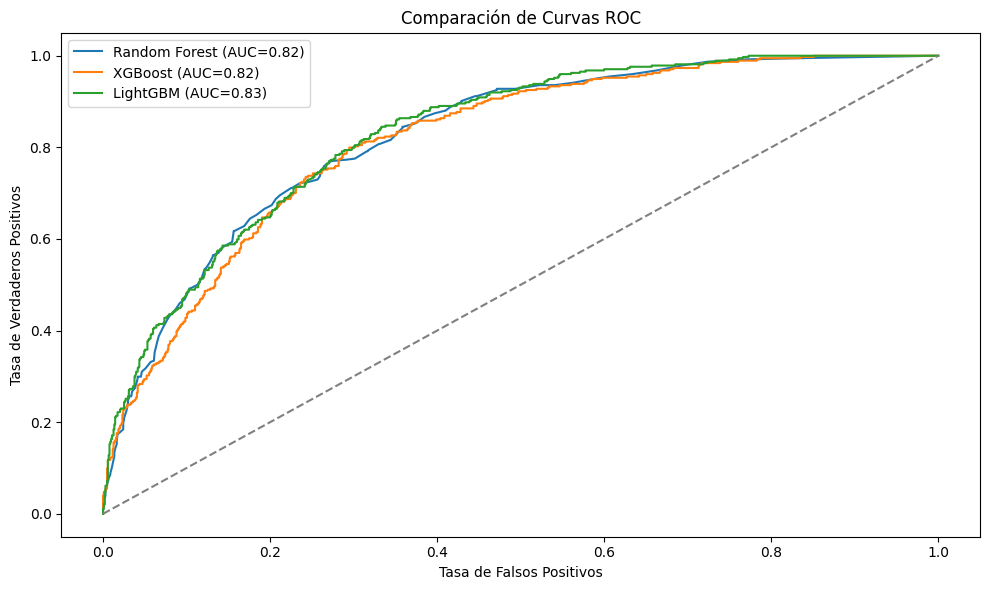

AUC Random Forest: 0.82
AUC XGBoost: 0.82
AUC LightGBM: 0.83


In [354]:
# Probabilidades de cada modelo sin cambios
from sklearn.metrics import roc_curve, roc_auc_score

y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
y_prob_cb = model_cb.predict_proba(X_test)[:, 1]
y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]

#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest: {auc_rf:.2f}")
print(f"AUC XGBoost: {auc_xgb:.2f}")
print(f"AUC LightGBM: {auc_cb:.2f}")

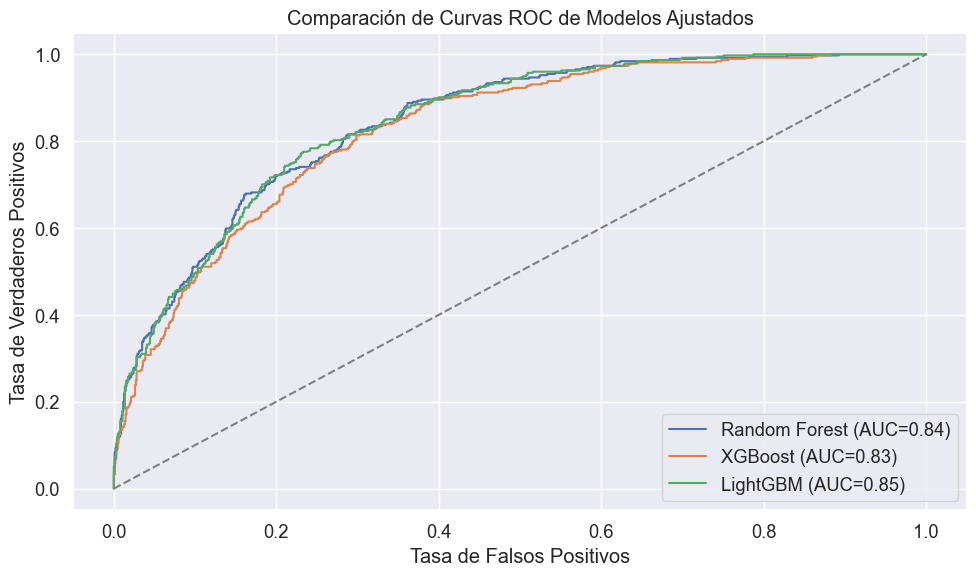

AUC Random Forest ajustado: 0.84
AUC XGBoost ajustado: 0.83
AUC LightGBM ajustado: 0.85


In [462]:
# Probabilidades de cada modelo ajustado
y_prob_rf = model_ajustado_rf.predict_proba(X_test)[:, 1]
y_prob_cb = model_ajustado_cb.predict_proba(X_test)[:, 1]
y_prob_xgb = model_ajustado_xgb.predict_proba(X_test)[:, 1]

#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC de Modelos Ajustados')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest ajustado: {auc_rf:.2f}")
print(f"AUC XGBoost ajustado: {auc_xgb:.2f}")
print(f"AUC LightGBM ajustado: {auc_cb:.2f}")

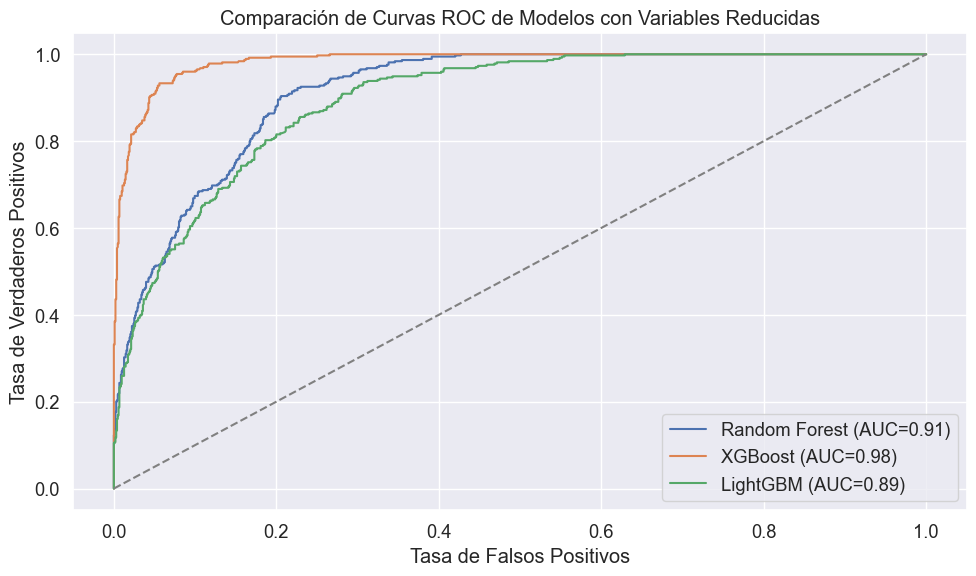

AUC Random Forest Reducido: 0.91
AUC XGBoost Reducido: 0.98
AUC LightGBM Reducido: 0.89


In [468]:
# Probabilidades de cada modelo reducido


y_prob_rf = rdmforest_model_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_cb = model_ajustado_cb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
y_prob_xgb = model_ajustado_xgb_reducido.predict_proba(X_test.drop(columns=low_importance))[:, 1]
#Curva ROC y AUC para Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)
# Curva ROC y AUC para CatBoost
fpr_cb, tpr_cb, _ = roc_curve(y_test, y_prob_cb)
auc_cb = roc_auc_score(y_test, y_prob_cb)
# Curva ROC y AUC para XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC={auc_xgb:.2f})')
plt.plot(fpr_cb, tpr_cb, label=f'LightGBM (AUC={auc_cb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Comparación de Curvas ROC de Modelos con Variables Reducidas')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.tight_layout()
plt.show()

print(f"AUC Random Forest Reducido: {auc_rf:.2f}")
print(f"AUC XGBoost Reducido: {auc_xgb:.2f}")
print(f"AUC LightGBM Reducido: {auc_cb:.2f}")

## 6. Interpretación
### 6.1 Analisis de las variables relevantes de XGBoost Reducido

In [527]:
importancia = model_ajustado_xgb_reducido.feature_importances_
feature_importance = sorted(
    zip(X.columns, importancia), 
    key=lambda x: x[1], 
    reverse=True
)
importance_xgb = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia de las características en XGBoost con variables reducidas:")
print(importance_xgb.head(10))   



Importancia de las características en XGBoost con variables reducidas:
                                             Feature  Importance
0                           Tipo de Contrato_Bianual    0.462340
1                         Rango_Contrato_Riesgo Bajo    0.157044
2                                           Género_M    0.132740
3     Método de Pago_Tarjeta de crédito (automático)    0.019208
4                                   Múltiples Líneas    0.017667
5  Método de Pago_Transferencia bancaria (automát...    0.017594
6                              Facturación Sin Papel    0.015979
7                                    Soporte Técnico    0.015525
8                                 Seguridad en Línea    0.014095
9                                Servicio Telefónico    0.013296


In [594]:
gain_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='gain')
gain_xgb = sorted(gain_xgb.items(), key=lambda x: x[1], reverse=True)
importance_gain_xgb = pd.DataFrame(gain_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Gain:")
print(importance_gain_xgb.head(10))



Importancia de Características por Gain:
                             Feature  Importance
0           Tipo de Contrato_Mensual   51.146496
1  Servicio de Internet_Fibra Óptica   17.373047
2           Tipo de Contrato_Bianual   14.684439
3         Rango_Contrato_Riesgo Bajo    2.124896
4                 Seguridad en Línea    1.954409
5        Rango_Contrato_Riesgo Medio    1.946372
6                    sqr_costo_total    1.767696
7                       TV por Cable    1.717409
8                  Respaldo en Línea    1.559266
9                   Múltiples Líneas    1.470856


In [593]:
#Cobertura para modelo XGBoost
cover_xgb = model_ajustado_xgb_reducido.get_booster().get_score(importance_type='cover')
cover_xgb = sorted(cover_xgb.items(), key=lambda x: x[1], reverse=True)
importance_cover_xgb = pd.DataFrame(cover_xgb, columns=['Feature', 'Importance'])
print("\nImportancia de Características por Cobertura:")
print(importance_cover_xgb.head(10))



Importancia de Características por Cobertura:
                                          Feature  Importance
0                        Tipo de Contrato_Bianual  284.654175
1                        Tipo de Contrato_Mensual  276.195221
2               Servicio de Internet_Fibra Óptica  203.876785
3                      Rango_Contrato_Riesgo Bajo   56.044235
4                              Seguridad en Línea   51.658081
5                                Múltiples Líneas   45.282623
6                                 sqr_costo_total   44.661083
7                                    TV por Cable   42.421070
8                               sqr_costo_mensual   41.288403
9  Método de Pago_Tarjeta de crédito (automático)   38.489529


In [596]:
# Variables top consistentes aparece en top 5 para Importance, Gain y Cover
top_features = set(importance_xgb['Feature'].head(5)) & set(importance_gain_xgb['Feature'].head(5)) & set(importance_cover_xgb['Feature'].head(5))
print("\nVariables Top Consistentes en Importancia, Gain y Cover:")
print(top_features) 


Variables Top Consistentes en Importancia, Gain y Cover:
{'Rango_Contrato_Riesgo Bajo', 'Tipo de Contrato_Bianual'}


In [ ]:
from sklearn.inspection import permutation_importance
# Importancia nativa del modelo
importancia_nativa = rdmforest_model_reducido.feature_importances_
#imprimir 10 de las variables más importantes de la importancia_nativa
features = X_reduced.columns
importances = importancia_nativa
feature_importance = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df = pd.DataFrame(feature_importance, columns=['Feature', 'Importance'])
print("\nImportancia Nativa del Modelo:")
print(importance_df.head(10))

# Cálculo de reducción de impureza
importancia_impureza = rdmforest_model_reducido.feature_importances_
# permutacion_importance para evaluar la importancia de las características
#Imprimir 10 de las variables más importantes de la importancia_impureza
features = X_reduced.columns
importances = importancia_impureza
feature_importance_impureza = sorted(zip(features, importances), key=lambda x: x[1], reverse=True)
importance_df_impureza = pd.DataFrame(feature_importance_impureza, columns=['Feature', 'Importance'])
print("\nImportancia por Reducción de Impureza:")
print(importance_df_impureza.head(10))

# Evaluar la importancia de las características con permutación
rdmforest_model_reducido.fit(X_reduced, y)
result = permutation_importance(
    rdmforest_model_reducido, 
    X_test.drop(columns=low_importance), 
    y_test, 
    n_repeats=30, 
    random_state=42
)
importancia_permutacion = result.importances_mean
#Imprimir 10 de las variables más importantes de la importancia_permutacion
features = X_reduced.columns
importances = importancia_permutacion
feature_importance_permutacion = sorted(zip(features, importances), key=lambda x: x [1], reverse=True)
importance_df_permutacion = pd.DataFrame(feature_importance_permutacion, columns=['Feature', 'Importance'])
print("\nImportancia por Permutación:")
print(importance_df_permutacion.head(10))   


Importancia Nativa del Modelo:
                             Feature  Importance
0                    sqr_costo_total    0.184317
1           Tipo de Contrato_Mensual    0.157034
2                  sqr_costo_mensual    0.110154
3  Servicio de Internet_Fibra Óptica    0.084502
4         Rango_Contrato_Riesgo Bajo    0.071465
5           Tipo de Contrato_Bianual    0.051440
6                 Seguridad en Línea    0.045332
7                    Soporte Técnico    0.035512
8                  Respaldo en Línea    0.030521
9                      sqr_servicios    0.028674

Importancia por Reducción de Impureza:
                             Feature  Importance
0                    sqr_costo_total    0.184317
1           Tipo de Contrato_Mensual    0.157034
2                  sqr_costo_mensual    0.110154
3  Servicio de Internet_Fibra Óptica    0.084502
4         Rango_Contrato_Riesgo Bajo    0.071465
5           Tipo de Contrato_Bianual    0.051440
6                 Seguridad en Línea    0.0453

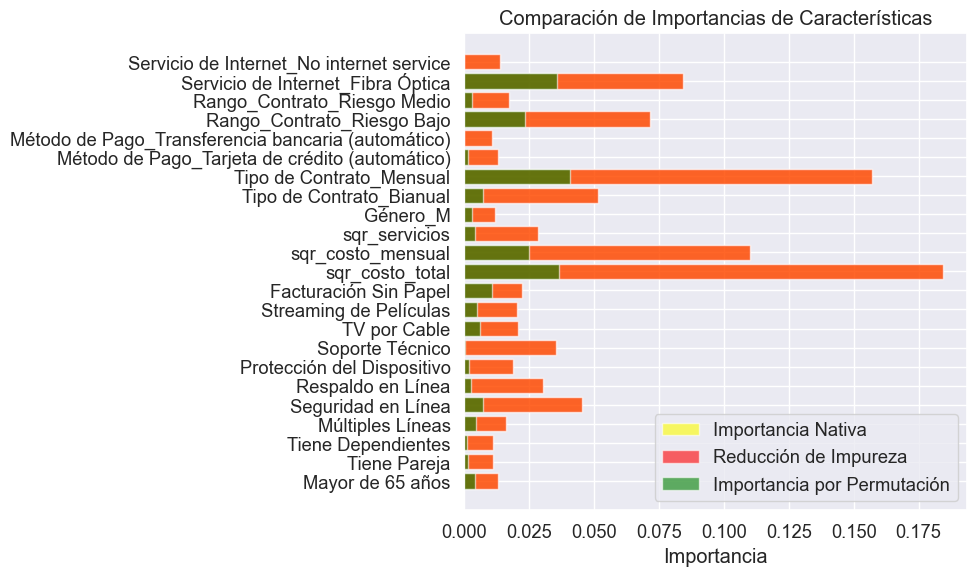

In [618]:
#Graficar las importancias
plt.figure(figsize=(10, 6))
plt.barh(X_reduced.columns, importancia_nativa, label='Importancia Nativa', color='yellow', alpha=0.6)
plt.barh(X_reduced.columns, importancia_impureza, label='Reducción de Impureza', color='red', alpha=0.6)
plt.barh(X_reduced.columns, importancia_permutacion, label='Importancia por Permutación', color='green', alpha=0.6)
plt.xlabel('Importancia')
plt.title('Comparación de Importancias de Características')
plt.legend()
plt.tight_layout()  

In [619]:
# Variables top consistentes para random forest
top_features_rf = set(X_reduced.columns[importancia_nativa > 0.01]) & set(X_reduced.columns[importancia_impureza > 0.01]) & set(X_reduced.columns[importancia_permutacion > 0.01])
print("\nVariables Top Consistentes en Importancias de Random Forest:")
print(top_features_rf)  



Variables Top Consistentes en Importancias de Random Forest:
{'Rango_Contrato_Riesgo Bajo', 'sqr_costo_mensual', 'Facturación Sin Papel', 'Servicio de Internet_Fibra Óptica', 'Tipo de Contrato_Mensual', 'sqr_costo_total'}


Entregables
* Notebook con análisis completo
* Modelo final entrenado
* Presentación ejecutiva
* Informe de hallazgos
